<a href="https://colab.research.google.com/github/chandansinghthakur/flight_price_prediction/blob/main/Flight_price_prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name = Flight Fare Prediction

#Problem Statement
### 1. This dataset comprises of Flight Price rtaken from Kaggle.
### 2. A user can predict the price of Flight Fare based on input features.
### 3. Prediction results can be useful for the traveller to get suggested price.
#### 4. dataset_url= https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh
 

In [71]:
url = r"https://raw.githubusercontent.com/chandansinghthakur/flight_price_prediction/main/Flight%20Fare%20Prediction%20Dataset.csv"

# Importing necessary libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from math import *


#Loading Flight data

In [73]:
df = pd.read_csv(url)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [74]:
df.shape

(10683, 11)

#summary of dataset

In [75]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [76]:
#check null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#Exploring the DATA

In [77]:
features = df.columns
features

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [78]:
#definig the numerical and categorical features
numeric_feature = [feature for feature in features if df[feature].dtype != 'O']
cat_feature = [feature for feature in features if df[feature].dtype == 'O']

print(f"we have {len(numeric_feature)} numerical features : {numeric_feature} ")
print(f"we have {len(cat_feature)} numerical features : {cat_feature} ")

we have 1 numerical features : ['Price'] 
we have 10 numerical features : ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info'] 


#Feature Information
**Airline**: Name of the Airline from which the Ticket is Booked.

**Date_of_Journey**: Date of Journey of the Traveller.

**Source**: Source from which the Airline Would Departure.

**Destination**: Destination to Which Airline Would Arrive.

**Route**: Route of the Airline from Source to Destination.

**Dep_Time**: Time at which Flight Would Departure from the Source.

**Arrival_Time**: Time at which Flight Would Arrive at the Destination.

**Duration**: Duration that Airline Takes to fly from Source to Destination.

**Total_Stops**: Total No of Stops that Airline takes Between Source and Destination.

**Additional_Info**: Any Additional Info about the Airline.

**Price**: Fare of the Ticket to fly from Source to Destination.

In [79]:
#Proportion of count data of each categorical columns
for col in cat_feature:
  print(df[col].value_counts(normalize=True)*100)
  print("------------------------------------------------------------------------------------")

Jet Airways                          36.029205
IndiGo                               19.217448
Air India                            16.399888
Multiple carriers                    11.195357
SpiceJet                              7.657025
Vistara                               4.483759
Air Asia                              2.986053
GoAir                                 1.815969
Multiple carriers Premium economy     0.121689
Jet Airways Business                  0.056164
Vistara Premium economy               0.028082
Trujet                                0.009361
Name: Airline, dtype: float64
------------------------------------------------------------------------------------
18/05/2019    4.717776
6/06/2019     4.708415
21/05/2019    4.652251
9/06/2019     4.633530
12/06/2019    4.614809
9/05/2019     4.530563
21/03/2019    3.959562
15/05/2019    3.791070
27/05/2019    3.575775
27/06/2019    3.323037
24/06/2019    3.285594
1/06/2019     3.201348
3/06/2019     3.117102
15/06/2019    3.070299

#Univariate analysis

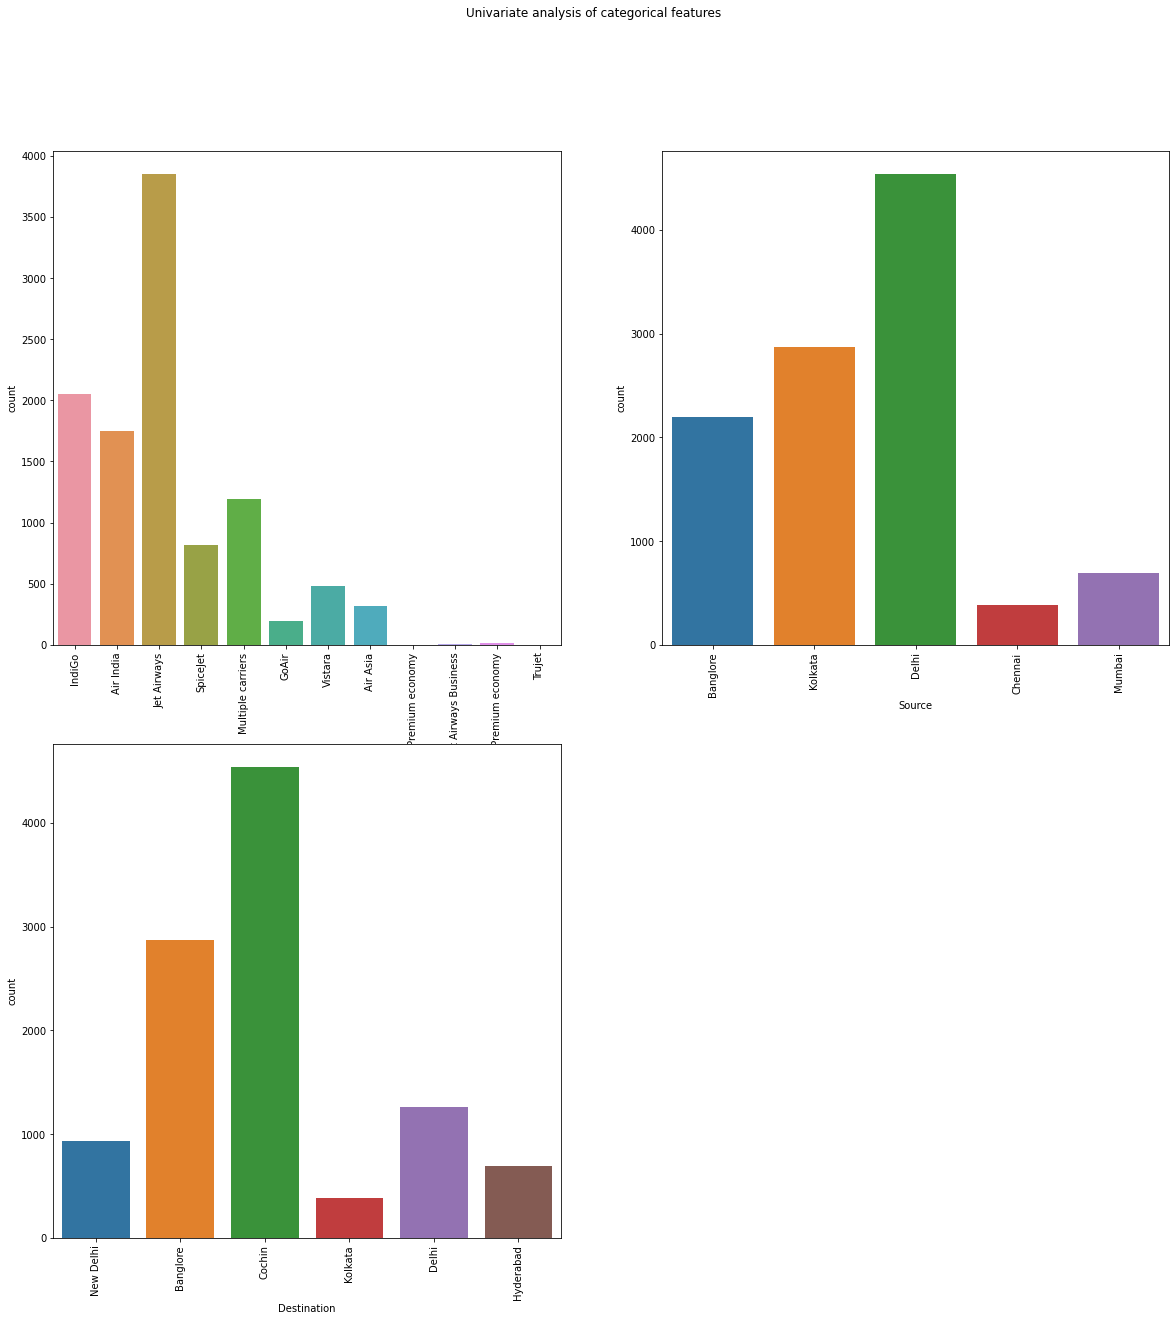

In [80]:
# categorical columns
plt.figure(figsize=(20,20))
plt.suptitle('Univariate analysis of categorical features',fontweight=20)
cat1 = ['Airline', 'Source', 'Destination']
for i in range(0, len(cat1)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=df[cat1[i]])
  plt.xticks(rotation=90)


# Multivariate analysis

In [81]:
#checking milticollinearity for categorical features
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_feature:
  if chi2_contingency(pd.crosstab(df['Price'],df[feature]))[1]<0.05:
    chi2_test.append('Reject Null Hypothesis')
  else:
    chi2_test.append('Accept Null Hypothesis')

result  = pd.DataFrame(data=[cat_feature,chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Airline,Reject Null Hypothesis
1,Date_of_Journey,Reject Null Hypothesis
2,Source,Reject Null Hypothesis
3,Destination,Reject Null Hypothesis
4,Route,Reject Null Hypothesis
5,Dep_Time,Reject Null Hypothesis
6,Arrival_Time,Reject Null Hypothesis
7,Duration,Reject Null Hypothesis
8,Total_Stops,Reject Null Hypothesis
9,Additional_Info,Reject Null Hypothesis


In [82]:
#Checking Null Values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [83]:
#Dropping null values
df.dropna(inplace=True)

In [84]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Top 10 Aviation companies whose tickets are sold most.

In [85]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [86]:
df.Airline.value_counts()[0:10]

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: Airline, dtype: int64

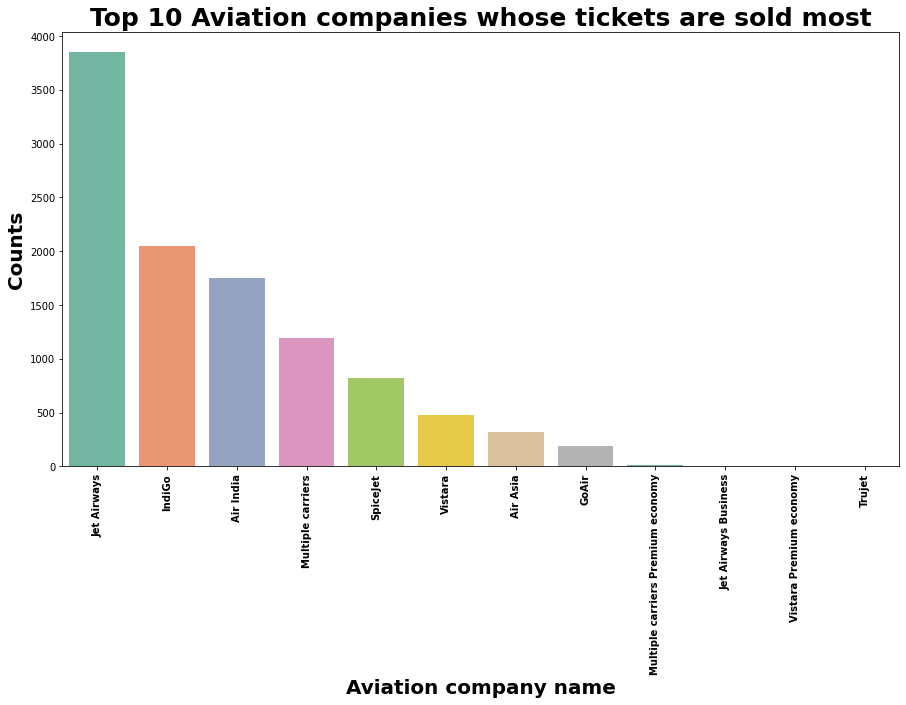

In [87]:
plt.figure(figsize=(15,8))
sns.countplot(x='Airline', data= df, palette = "Set2", order= df['Airline'].value_counts().index)
plt.title('Top 10 Aviation companies whose tickets are sold most', weight='bold', fontsize=25)
plt.xlabel("Aviation company name", weight='bold',fontsize=20)
plt.ylabel("Counts",weight='bold',fontsize=20)
plt.xticks(rotation=90,weight='bold')
plt.show()

#Check mean price of Jet Airways whose flight tickets are sold the most

In [88]:
airlines = df.Airline.unique()
airlines

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [89]:
for i in airlines:
  airline_mean_price = df[df['Airline']== i]['Price'].mean()
  print(f"The mean price of {i} Airline is {round(airline_mean_price,2)} rupees \n")

The mean price of IndiGo Airline is 5673.68 rupees 

The mean price of Air India Airline is 9612.43 rupees 

The mean price of Jet Airways Airline is 11643.92 rupees 

The mean price of SpiceJet Airline is 4338.28 rupees 

The mean price of Multiple carriers Airline is 10902.68 rupees 

The mean price of GoAir Airline is 5861.06 rupees 

The mean price of Vistara Airline is 7796.35 rupees 

The mean price of Air Asia Airline is 5590.26 rupees 

The mean price of Vistara Premium economy Airline is 8962.33 rupees 

The mean price of Jet Airways Business Airline is 58358.67 rupees 

The mean price of Multiple carriers Premium economy Airline is 11418.85 rupees 

The mean price of Trujet Airline is 4140.0 rupees 



In [115]:
avg_price = []
max_price = []
min_price = []
total_price= []
for i in airlines:
  airline_mean_price = df[df['Airline']== i]['Price'].mean()
  airline_max_price = df[df['Airline']== i]['Price'].max()
  airline_min_price = df[df['Airline']== i]['Price'].min()
  airline_total_price = df[df['Airline']== i]['Price'].sum()
  avg_price.append(floor(airline_mean_price))
  max_price.append(airline_max_price)
  min_price.append(airline_min_price)
  total_price.append(airline_total_price)



In [116]:
dict = {'name': airlines, 'Avg_price': avg_price, 'max_price': max_price, 'min_price': min_price, "total_price": total_price}
df1 = pd.DataFrame(dict)
df1

,name,Avg_price,max_price,min_price,total_price
0,IndiGo,5673,22153,2227,11648071
1,Air India,9612,31945,2050,16831361
2,Jet Airways,11643,54826,1840,44817461
3,SpiceJet,4338,23267,1759,3548717
4,Multiple carriers,10902,36983,5797,13039603
5,GoAir,5861,22794,3398,1137045
6,Vistara,7796,21730,3687,3734451
7,Air Asia,5590,13774,3383,1783293
8,Vistara Premium economy,8962,11793,5969,26887
9,Jet Airways Business,58358,79512,46490,350152


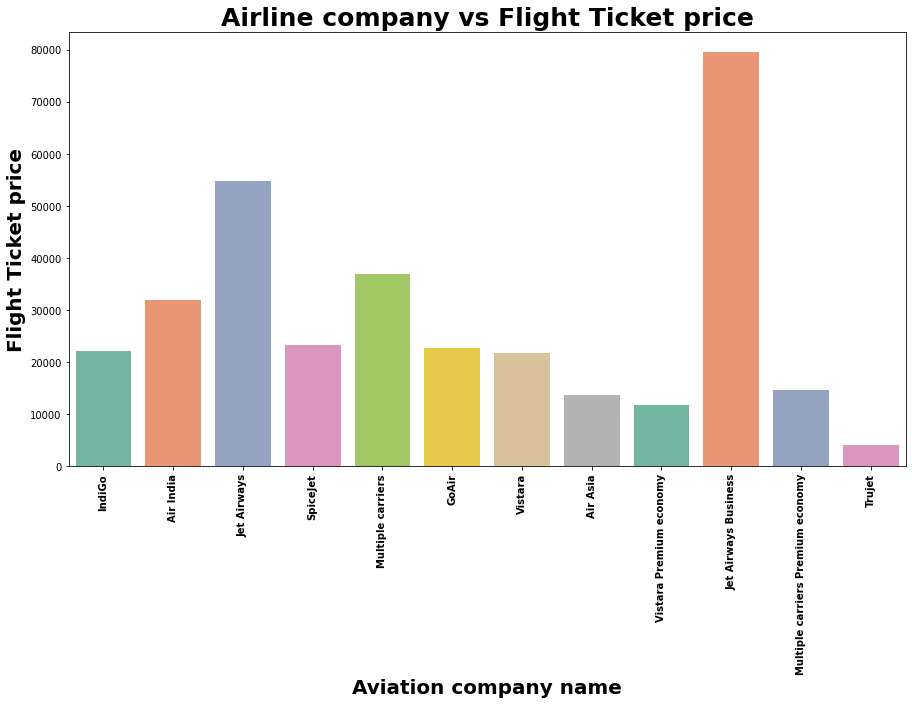

In [119]:
plt.figure(figsize=(15,8))
sns.barplot(x=df1.name, y=df1.max_price, palette = "Set2")
plt.title('Airline company vs Flight Ticket price', weight='bold', fontsize=25)
plt.xlabel("Aviation company name", weight='bold',fontsize=20)
plt.ylabel("Flight Ticket price",weight='bold',fontsize=20)
plt.xticks(rotation=90,weight='bold')
plt.show()